Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

1. Import the Dataset using pandas from above mentioned url

In [2]:
url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'
df = pd.read_csv(url)

2. High Level Data Understanding:

a. Find no. of rows & columns in the dataset

In [3]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  57394
Number of Columns:  49


b. Data types of columns

In [4]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

c. Info & describe of data in dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


3. Low Level Data Understanding :

a. Find count of unique values in location column

In [7]:
df['location'].value_counts()

Afghanistan          323
Iran                 323
Macedonia            323
Luxembourg           323
Lithuania            323
                    ... 
Hong Kong             72
Solomon Islands       33
Wallis and Futuna     32
Marshall Islands      20
Vanuatu                7
Name: location, Length: 216, dtype: int64

b. Find which continent has maximum frequency using values 
counts.

In [8]:
df['continent'].value_counts().idxmax()

'Europe'

c. Find maximum & mean value in 'total_cases'

In [9]:
df['total_cases'].agg(['max' , 'mean'])

max     5.515465e+07
mean    1.677974e+05
Name: total_cases, dtype: float64

d. Find 25%,50% & 75% quartile value in 'total_deaths'

In [10]:
df.total_deaths.quantile([0.25,0.5,0.75])

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

e. Find which continent has maximum 
'human_development_index'

In [11]:
df_new = df[['continent' , 'human_development_index']]
df_new[df_new['human_development_index'] == df_new['human_development_index'].max()].drop_duplicates()

,continent,human_development_index
38632,Europe,0.953


f. Find which continent has minimum 'gdp_per_capita'

In [12]:
df_new1 = df[['continent' , 'gdp_per_capita']]
df_new1[df_new1['gdp_per_capita'] == df_new1['gdp_per_capita'].min()].drop_duplicates()

,continent,gdp_per_capita
10259,Africa,661.24


4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_ca
pita','
human_development_index'] and update the data frame.

In [13]:
df = df.filter(items = ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])

5. Data Cleaning

a. Remove all duplicates observations

In [14]:
df.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


b. Find missing values in all columns

In [15]:
df.isnull()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,True,False,False
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
57389,True,False,False,False,False,True,True
57390,True,False,False,False,False,True,True
57391,True,False,False,False,False,True,True
57392,True,False,False,False,False,True,True


c. Remove all observations where continent column value is 
missing
 Tip : using subset parameter in dropna

In [16]:
df = df.dropna(subset=['continent'])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


d. Fill all missing values with 0

In [17]:
df.replace(np.nan , 0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


6. Date time format :

a. Convert date column in datetime format using 
pandas.to_datetime


In [18]:
pd.to_datetime(df['date'])

0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
56743   2020-11-13
56744   2020-11-14
56745   2020-11-15
56746   2020-11-16
56747   2020-11-17
Name: date, Length: 56748, dtype: datetime64[ns]

b. Create new column month after extracting month data from 
date
 column.

In [19]:
df['month'] = pd.DatetimeIndex(df['date']).month
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498,12
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498,1
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498,2
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498,3
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535,11


7. Data Aggregation:

a. Find max value in all columns using groupby function on 
'continent'
 column
 Tip: use reset_index() after applying groupby

In [20]:
df.groupby('continent').max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,31/12/19,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,31/12/19,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,31/12/19,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,31/12/19,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,31/12/19,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,31/12/19,5876464.0,166014.0,22767.037,0.843,12


b. Store the result in a new dataframe named 'df_groupby'.
 (Use df_groupby dataframe for all further analysis)

In [21]:
df_groupby = df.groupby('continent').max().reset_index()

8. Feature Engineering :

a. Create a new feature 'total_deaths_to_total_cases' by ratio of
 'total_deaths' column to 'total_cases'

In [22]:
df['total_deaths_to_total_cases'] = df['total_deaths'] / df['total_cases']
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498,12,NaN
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498,1,NaN
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498,2,NaN
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498,3,NaN
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498,4,NaN
...,...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535,11,0.029324
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535,11,0.029321
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535,11,0.029251
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535,11,0.029251


9. Data Visualization :

a. Perform Univariate analysis on 'gdp_per_capita' column by 
plotting
 histogram using seaborn dist plot.

<AxesSubplot: xlabel='gdp_per_capita', ylabel='Count'>

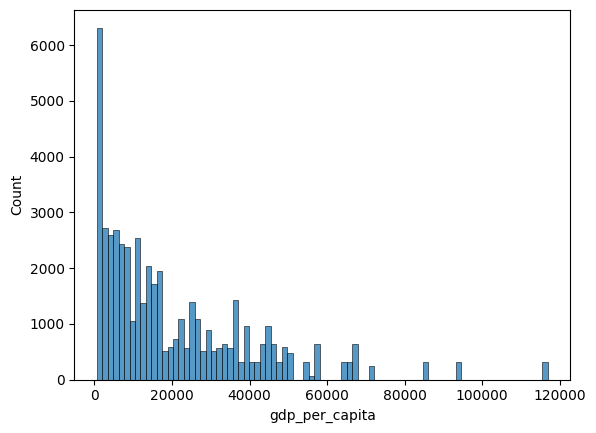

In [23]:
sns.histplot(data = df , x = 'gdp_per_capita')

b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'


<AxesSubplot: xlabel='total_cases', ylabel='gdp_per_capita'>

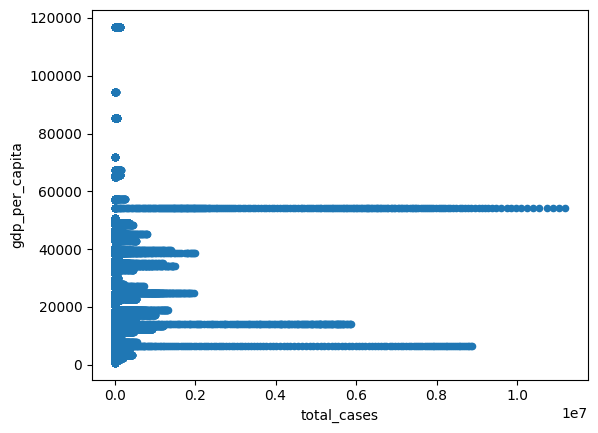

In [24]:
df.plot.scatter(x = 'total_cases' , y = 'gdp_per_capita')

c. Plot Pairplot on df_groupby dataset

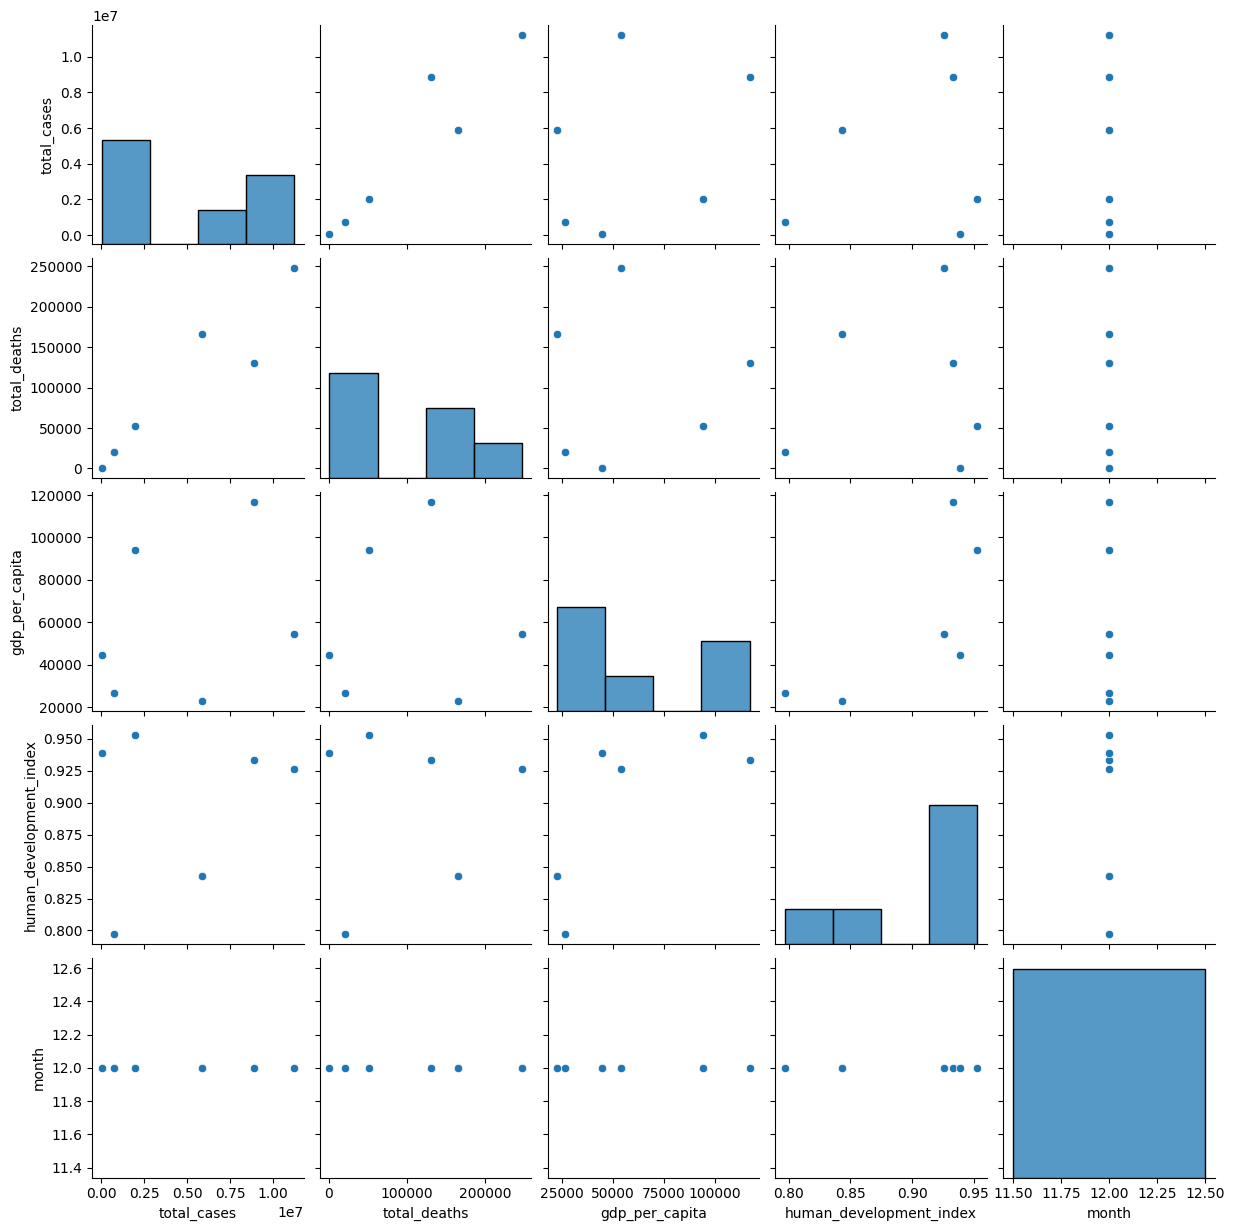

In [25]:
sns.pairplot(df_groupby)

d. Plot a bar plot of 'continent' column with 'total_cases' .
 Tip : using kind='bar' in seaborn catplot

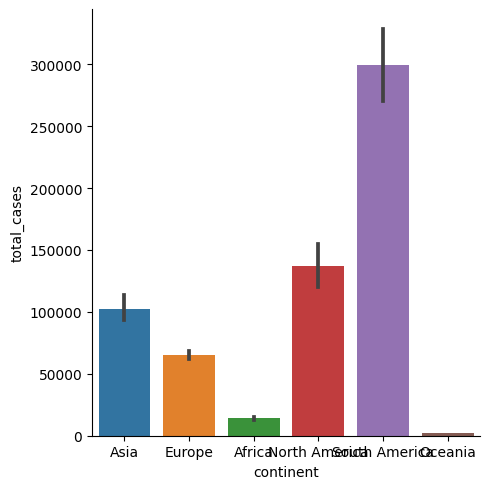

In [26]:
sns.catplot(x = 'continent' , y = 'total_cases' , kind = 'bar' , data = df)

10.Save the df_groupby dataframe in your local drive using 
pandas.to_csv
 function 

In [27]:
os.makedirs('C:\Edyoda Files\Final Project', exist_ok=True)
df_groupby.to_csv('C:\Edyoda Files\Final Project/groupby.csv')